# Import libraries

In [6]:
import numpy as np
import pandas as pd
import json
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight') 
from wordcloud import WordCloud

In [7]:
df = pd.read_csv("cleaned-movie-dataset.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3001 entries, the to Label
dtypes: int64(3001)
memory usage: 118.4 MB


,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Label
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


# Exploration data analysis

## 1. Correlation between words and email labels

In [9]:
# Calculate correlation coefficients between each word and the target variable
correlations = df.corr()['Label'].sort_values()

# Top 10 words most strongly associated with spam emails
top_spam = correlations[1:].tail(10).iloc[::-1]
print("Top 10 words most strongly associated with spam emails:")
print(top_spam)

# Top 10 words most strongly associated with not-spam emails
top_not_spam = correlations[1:].head(10)
print("\nTop 10 words most strongly associated with not-spam emails:")
print(top_not_spam)

Top 10 words most strongly associated with spam emails:
Label    1.000000
more     0.258152
our      0.228187
able     0.222219
best     0.221703
ur       0.220253
sex      0.220092
sec      0.217402
money    0.217215
soft     0.213382
Name: Label, dtype: float64

Top 10 words most strongly associated with not-spam emails:
hpl         -0.266518
hanks       -0.266070
thank       -0.262384
attached    -0.236558
daren       -0.236180
forwarded   -0.230765
subject     -0.227754
hp          -0.225846
aren        -0.206063
nom         -0.202600
Name: Label, dtype: float64


The top 10 words most strongly associated with spam emails, in order of highest correlation coefficient, are: more, our, able, best, ur, sex, sec, money, and soft. The strongest word association with the spam label is the word "more", followed closely by "our" and "able". These words may be common in spam emails because they are often used to make false claims or offer something of value in exchange for personal information or money.

On the other hand, the top 10 words most strongly associated with not-spam emails, in order of highest negative correlation coefficient, are: hpl, hanks, thank, attached, daren, forwarded, subject, hp, aren, and nom. The strongest word association with the not-spam label is the word "hpl", followed by "hanks" and "thank". These words may be common in not-spam emails because they are often used in professional or formal communications.

##  2. Distribution of label classes

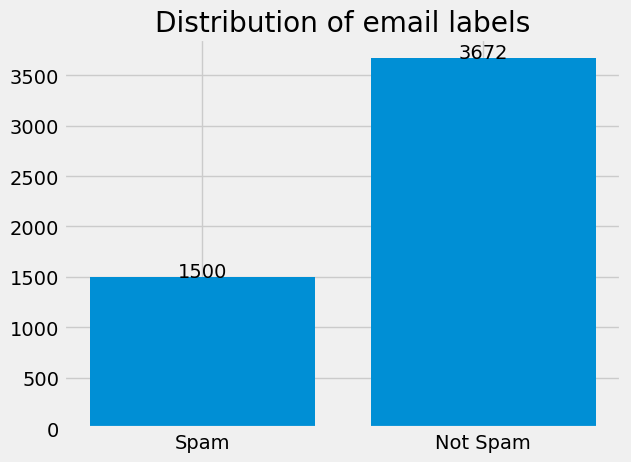

In [13]:
spam_count = (df['Label'] == 1).sum()
not_spam_count = (df['Label'] == 0).sum()

plt.bar(['Spam', 'Not Spam'], [spam_count, not_spam_count])
plt.title('Distribution of email labels')
for i, v in enumerate([spam_count, not_spam_count]):
    plt.text(i, v, str(v), color='black', ha='center')
plt.show()

In this dataset, there is 3672 non-spam emaild and 1500 spam emails. This indicates that the dataset is imbalanced because the number of non-spam emails is significantly higher than the number of spam emails. Therefore, the model may have better performance on non-spam emails but may not perform well on spam emails.

In the end, we have used oversampling techniques to solve this problem. 

## 3. Word frequency in spam and not-spam emails

In [11]:
spam_words = df.loc[df['Label'] == 1].iloc[:, 1:-1].sum().sort_values(ascending=False)[:10]
print("\nTop 10 words with highest frequency in spam emails:")
print(spam_words)

not_spam_words = df.loc[df['Label'] == 0].iloc[:, 1:-1].sum().sort_values(ascending=False)[:10]
print("\nTop 10 words with highest frequency in not-spam emails:")
print(not_spam_words)


Top 10 words with highest frequency in spam emails:
e    151062
t    109878
a    105425
o    103997
i    100761
n     90840
r     89645
s     83720
l     58852
c     54181
dtype: int64

Top 10 words with highest frequency in not-spam emails:
e    287499
t    202913
a    181711
o    180973
n    157937
r    145229
i    136416
s    132531
l    101465
c    100509
dtype: int64


The frequency of the top 10 most common words in both spam and not-spam emails were also calculated. The results show that the most common words in both types of emails are similar, with "e", "t", "a", "o", "n", "r", "i", "s", "l", and "c" being the top 10 in both cases, though their frequencies are higher in not-spam emails.

It is worth noting that while the frequency of these common words may not be particularly informative in distinguishing between spam and not-spam emails on their own, they could be useful in combination with other features in a machine learning model. For example, the presence or absence of these common words could be used in combination with the top 10 words most strongly associated with either label to improve the accuracy of email classification models.

## 4. Distribution of word frequency

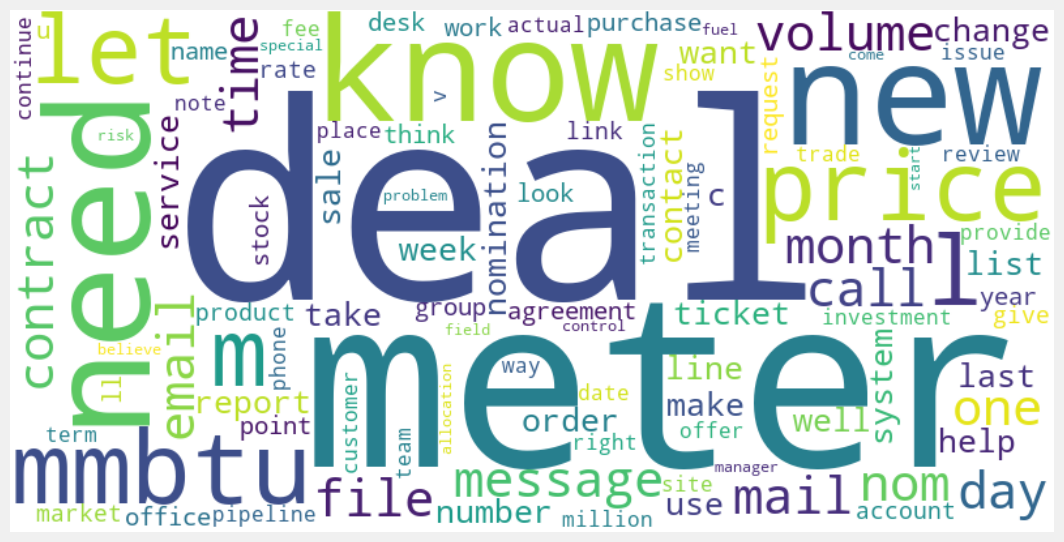

In [6]:
# concatenate all email content into a single string
email_text = ' '.join(df.columns[1:-1].values.tolist())

# generate a word cloud of the most common words in the email dataset
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(email_text)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

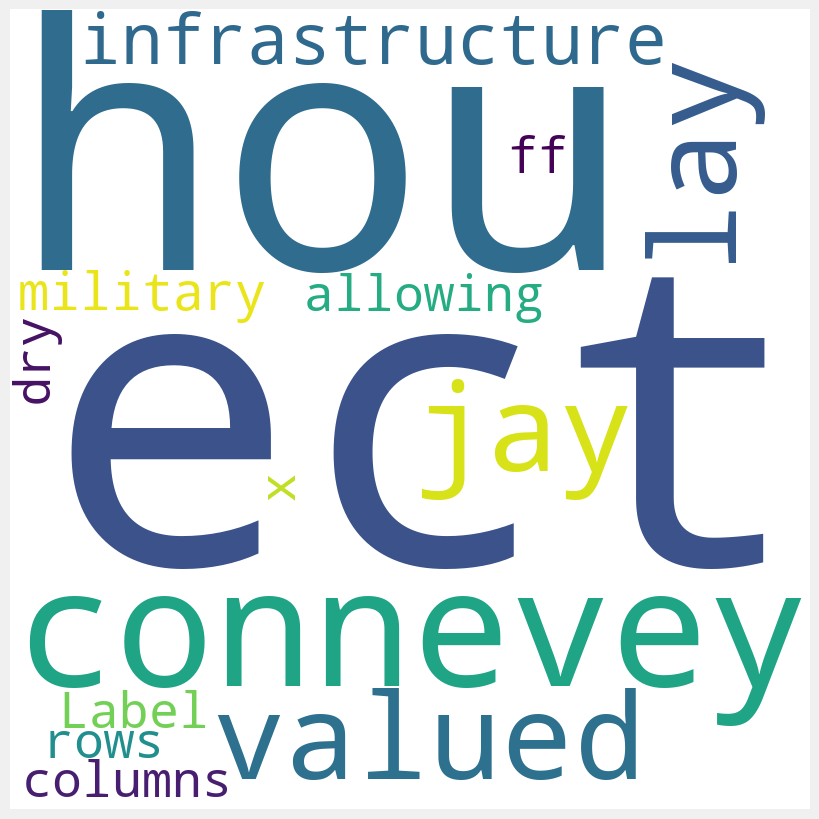

In [7]:
# Create word cloud for non-spam emails
spam_emails = df[df['Label'] == 0]
spam_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(str(spam_emails))

# Plot the word cloud for non-spam emails
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

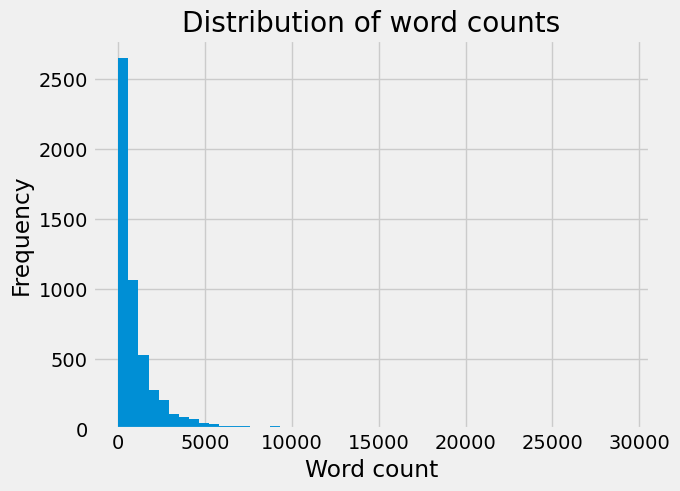

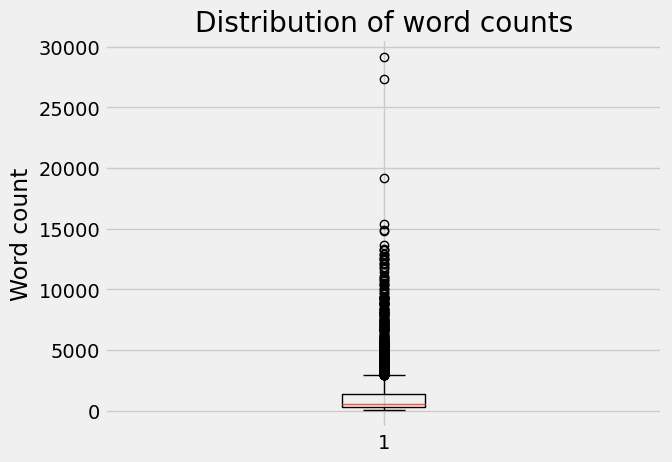

Number of outliers: 455


In [8]:
# Create a new column for the total word count of each email
df['total_words'] = df.iloc[:, 1:].sum(axis=1)

# Plot a histogram of the total word count
plt.hist(df['total_words'], bins=50)
plt.title('Distribution of word counts')
plt.xlabel('Word count')
plt.ylabel('Frequency')
plt.show()

# Plot a boxplot of the total word count
plt.boxplot(df['total_words'])
plt.title('Distribution of word counts')
plt.ylabel('Word count')
plt.show()

# Identify any outliers or unusual patterns in the data
q1, q3 = df['total_words'].quantile([0.25, 0.75])
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
num_outliers = len(df[df['total_words'] > upper_bound]) + len(df[df['total_words'] < lower_bound])

print(f"Number of outliers: {num_outliers}")

In [9]:
# Calculate the correlation coefficient between each word and the target variable
corr_coeffs = []
for col in df.columns[1:-1]:
    corr_coeffs.append(np.corrcoef(df[col], df['Label'])[0][1])

# Create a dataframe of the correlation coefficients
corr_df = pd.DataFrame({'word': df.columns[1:-1], 'correlation': corr_coeffs})

# Sort the dataframe by correlation coefficient
corr_df = corr_df.sort_values('correlation', ascending=False)

# Print the top 10 words most strongly associated with spam emails
print("Top 10 words most strongly associated with spam emails:")
print(corr_df.head(10))

# Print the top 10 words most strongly associated with not-spam emails
print("Top 10 words most strongly associated with not-spam emails:")
print(corr_df.tail(10))

Top 10 words most strongly associated with spam emails:
       word  correlation
2999  Label     1.000000
98     more     0.258152
41      our     0.228187
362    able     0.222219
289    best     0.221703
2832     ur     0.220253
1091    sex     0.220092
1360    sec     0.217402
241   money     0.217215
646    soft     0.213382
Top 10 words most strongly associated with not-spam emails:
           word  correlation
2867       aren    -0.206063
2310         hp    -0.225846
316     subject    -0.227754
51    forwarded    -0.230765
67        daren    -0.236180
80     attached    -0.236558
784       thank    -0.262384
417       hanks    -0.266070
36          hpl    -0.266518
159      thanks    -0.271433


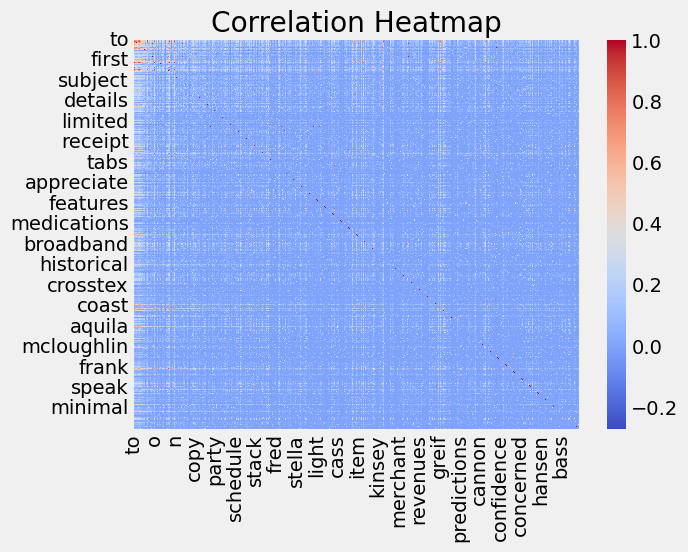

In [10]:
# Plot a heatmap of the correlations
corr_matrix = df.iloc[:, 1:-1].corr()
sb.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()